In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import xarray as xr
import cmocean
import pickle
import time
import datetime
from salishsea_tools import viz_tools
from salishsea_tools import geo_tools
from salishsea_tools import grid_tools
from salishsea_tools import utilities
%matplotlib inline

## Loading Datasets

#### Load datasets -> Save locally as numpy arrays

In [2]:
salinity = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV18-06")
#ssh = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSgSurfaceTracerFields1hV18-06")

#### Load arrays

In [3]:
times_salinity = salinity.time.sel(time = salinity.time.dt.year.isin([2015,2016,2017,2018])).values.astype('datetime64[s]').astype(datetime.datetime)
Y = np.arange(540); X = np.arange(355)

##### Creating local file for SoG timeseries

In [11]:
for year in [2018]:
    filename= ("/home/abhudia/Desktop/ssh,salinity/{}salinity.pickle").format(str(year))
    unpickle = open(filename, "rb")
    locals()["salinity" + str(year)] = pickle.load(unpickle)
    times = []
    for time in times_salinity: 
        if time.year == year:
            times.append(time)
    locals()["salinity" + str(year)] = xr.DataArray(locals()["salinity" + str(year)], coords = [times, Y, X], dims = ['time', 'Y' , 'X'])
    locals()["sog" + str(year)] = locals()["salinity" + str(year)].isel(X = 242, Y = 274).values
    locals()["salinity" + str(year)] = False
    fname = "sog{}.pickle".format(str(year))
    picklefile = open(fname, 'wb')
    pickle.dump(locals()["sog" + str(year)], picklefile)
    locals()["sog" + str(year)] = False

##### Loading SoG time series and corresponding time lists

In [12]:
for year in [2015, 2016, 2017, 2018]:
    fname = "sog{}.pickle".format(str(year))
    file = open(fname, "rb")
    locals()["sog" + str(year)] = pickle.load(file)
    locals()["t" + str(year)] = []
    for time in times_salinity: 
        if time.year == year:
            locals()["t" + str(year)].append(time)    

# Freshet Analysis

In [59]:
years = [2015,2016,2017,2018]
freshet_salinity = []

## Freshet 2015

the lowest salinity was 7.072141170501709 g kg-1, occuring at point [3729] 



Text(0, 0.5, 'Salinity (g kg-1)')

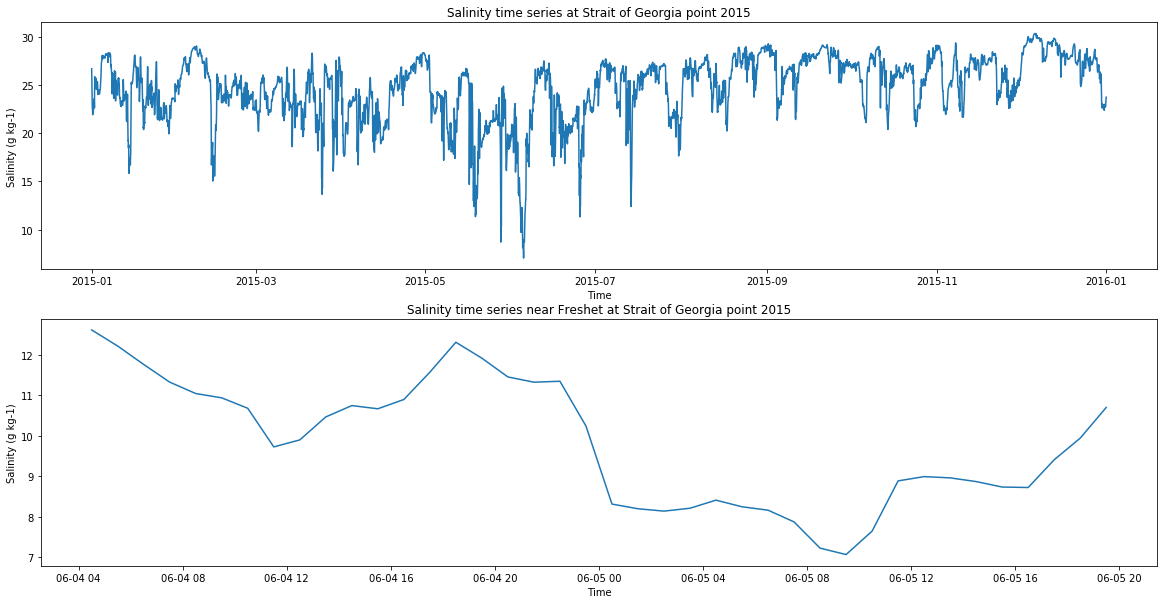

In [60]:
freshet2015 = np.min(sog2015)
freshet_salinity.append(freshet2015)
text = "the lowest salinity was {} g kg-1, occuring at point {} \n".format(freshet2015, str(np.where(sog2015 == freshet2015)[0]))
print(text)

fig = plt.figure(figsize = (20,10))
plt.subplot(211)
plt.plot(t2015, sog2015)
plt.title('Salinity time series at Strait of Georgia point 2015')
plt.xlabel('Time')
plt.ylabel('Salinity (g kg-1)')

plt.subplot(212)
plt.plot(t2015[3700:3740], sog2015[3700:3740])
plt.title('Salinity time series near Freshet at Strait of Georgia point 2015')
plt.xlabel('Time')
plt.ylabel('Salinity (g kg-1)')

## Freshet 2016

the lowest salinity was 10.337932586669922 g kg-1, occuring at point [4024] 



Text(0, 0.5, 'Salinity (g kg-1)')

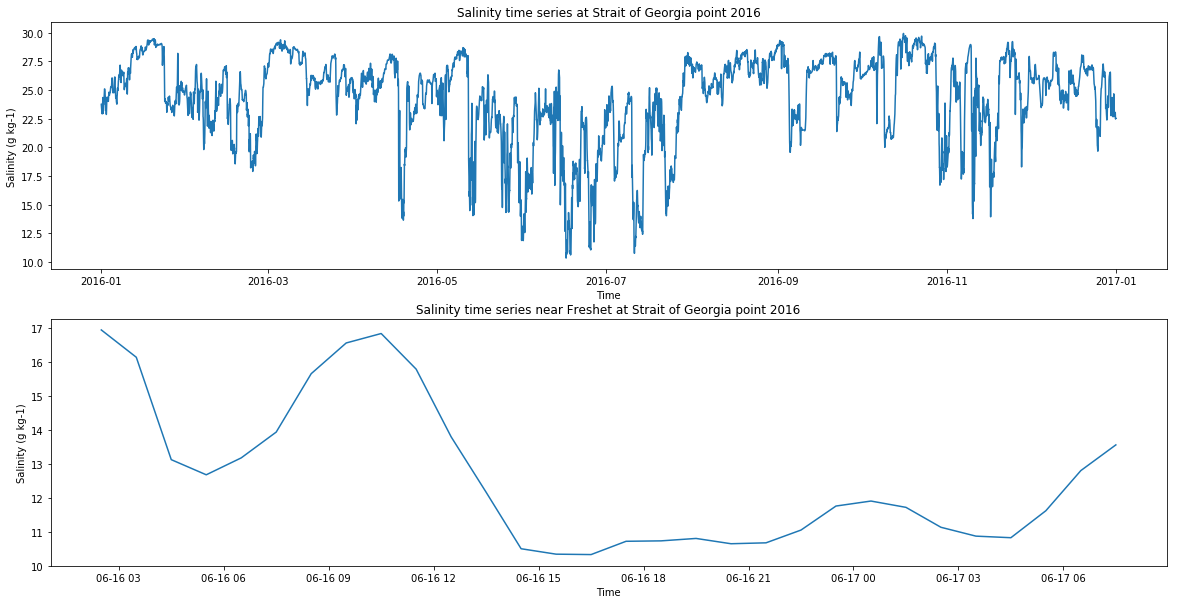

In [61]:
freshet2016 = np.min(sog2016)
freshet_salinity.append(freshet2016)
text = "the lowest salinity was {} g kg-1, occuring at point {} \n".format(freshet2016, str(np.where(sog2016 == freshet2016)[0]))
print(text)

fig = plt.figure(figsize = (20,10))
plt.subplot(211)
plt.plot(t2016, sog2016)
plt.title('Salinity time series at Strait of Georgia point 2016')
plt.xlabel('Time')
plt.ylabel('Salinity (g kg-1)')

plt.subplot(212)
plt.plot(t2016[4010:4040], sog2016[4010:4040])
plt.title('Salinity time series near Freshet at Strait of Georgia point 2016')
plt.xlabel('Time')
plt.ylabel('Salinity (g kg-1)')

## Freshet 2017

the lowest salinity was 3.0763986110687256 g kg-1, occuring at point [3728] 



Text(0, 0.5, 'Salinity (g kg-1)')

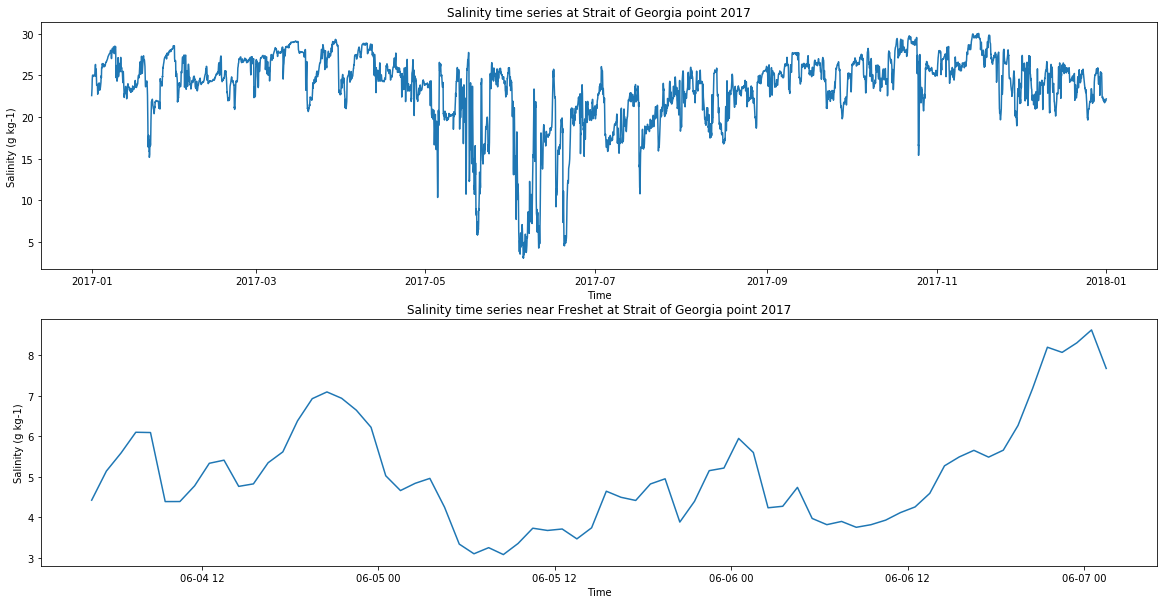

In [62]:
freshet2017 = np.min(sog2017)
freshet_salinity.append(freshet2017)
text = "the lowest salinity was {} g kg-1, occuring at point {} \n".format(freshet2017, str(np.where(sog2017 == freshet2017)[0]))
print(text)

fig = plt.figure(figsize = (20,10))
plt.subplot(211)
plt.plot(t2017, sog2017)
plt.title('Salinity time series at Strait of Georgia point 2017')
plt.xlabel('Time')
plt.ylabel('Salinity (g kg-1)')

plt.subplot(212)
plt.plot(t2017[3700:3770], sog2017[3700:3770])
plt.title('Salinity time series near Freshet at Strait of Georgia point 2017')
plt.xlabel('Time')
plt.ylabel('Salinity (g kg-1)')

## Freshet 2018

the lowest salinity was 2.1126484870910645 g kg-1, occuring at point [3439] 



Text(0, 0.5, 'Salinity (g kg-1)')

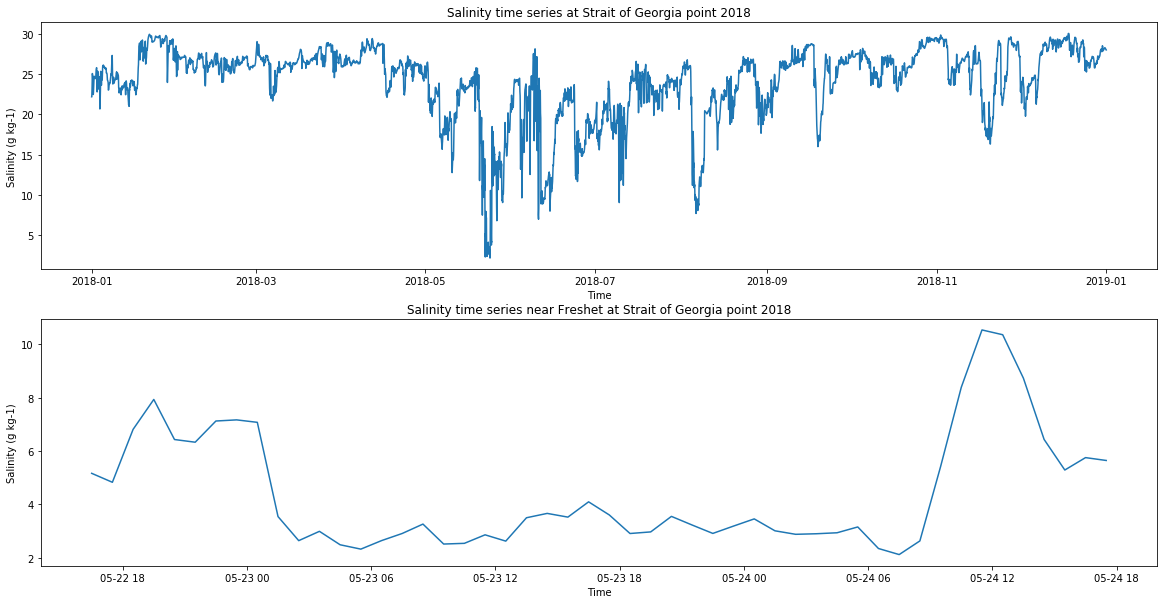

In [63]:
freshet2018 = np.min(sog2018)
freshet_salinity.append(freshet2018)
text = "the lowest salinity was {} g kg-1, occuring at point {} \n".format(freshet2018, str(np.where(sog2018 == freshet2018)[0]))
print(text)

fig = plt.figure(figsize = (20,10))
plt.subplot(211)
plt.plot(t2018, sog2018)
plt.title('Salinity time series at Strait of Georgia point 2018')
plt.xlabel('Time')
plt.ylabel('Salinity (g kg-1)')

plt.subplot(212)
plt.plot(t2018[3400:3450], sog2018[3400:3450])
plt.title('Salinity time series near Freshet at Strait of Georgia point 2018')
plt.xlabel('Time')
plt.ylabel('Salinity (g kg-1)')

## Overall

In [70]:
freshmin = years[np.argmin(freshet_salinity)]; freshmax = years[np.argmax(freshet_salinity)]
freshest = min(freshet_salinity); staleest = max(freshet_salinity)
text = "The year with the freshest freshet was {} (min salinity {} g kg-1)\nThe year with the least fresh freshet was {} (min salinity {} g kg-1)".format(freshmin, freshest, freshmax, staleest)
print(text)

The year with the freshest freshet was 2018 (min salinity 2.1126484870910645 g kg-1)
The year with the least fresh freshet was 2016 (min salinity 10.337932586669922 g kg-1)
